## Lead Assignment

In [246]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [247]:
Lead_data = pd.read_csv(r"C:\Users\ajeetkumar.ukande\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")


In [248]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [249]:
Lead_data.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [250]:
Lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [251]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [252]:
Lead_data.shape

(9240, 37)

In [253]:
# check for duplicate 
Lead_data.duplicated(subset = ['Prospect ID'], keep = False).sum()


0

In [254]:
Lead_data.duplicated(subset = ['Lead Number'], keep = False).sum()

0

No duplicate values in Prospect ID and Lead Number


Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

## EXPLORATORY DATA ANALYSIS

### Data Cleaning & Treatment:

In [255]:
#dropping Lead Number and Prospect ID since they have all unique values

Lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [257]:
import numpy as np

# Replace 'Select' values with NaN in the Lead_data DataFrame
Lead_data = Lead_data.apply(lambda x: x.replace('Select', np.nan))


In [258]:
Lead_data.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [260]:
# List of columns to drop
columns_to_drop = ['Magazine', 'Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content']

# Dropping the specified columns from the Lead_data DataFrame
Lead_data = Lead_data.drop(columns_to_drop, axis=1)


In [261]:
#checking null values in each rows

Lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [263]:
# Calculate the percentage of null values in each column
null_percentage = round((Lead_data.isnull().sum() / len(Lead_data)) * 100, 2)
null_percentage

In [265]:
# Set the threshold for missing values
missing_threshold = 45

# Calculate the percentage of missing values in each column
missing_percentage = (Lead_data.isnull().sum() / len(Lead_data)) * 100

# Get the names of columns with missing values exceeding the threshold
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index.tolist()

# Drop the specified columns from the Lead_data DataFrame
Lead_data = Lead_data.drop(columns_to_drop, axis=1)


In [266]:
Lead_data.shape

(9240, 23)

In [267]:
#checking null values percentage

round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

There is a huge value of null variables in some columns as seen above. But removing the rows with the null value will cost us a lot of data and they are important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.

In [269]:
# List of columns to fill with 'not provided'
columns_to_fill = ['Specialization', 'City', 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

# Fill missing values in the specified columns with 'not provided'
Lead_data[columns_to_fill] = Lead_data[columns_to_fill].fillna('not provided')

# Display DataFrame info to check for missing values
Lead_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [270]:
#checking null values percentage

round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [271]:
Lead_data.shape

(9240, 23)

### Categorical Attributes Analysis:

In [272]:
Lead_data['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [274]:
import numpy as np

# Define a function to categorize countries
def slots(x):
    return np.where(x == "India", "India", np.where(x == "not provided", "not provided", "outside india"))

# Apply the categorization function to the 'Country' column
Lead_data['Country'] = Lead_data['Country'].apply(slots)

# Display value counts of the 'Country' column
Lead_data['Country'].value_counts()


India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [275]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India

Lead_data['Country'] = Lead_data['Country'].replace('not provided','India')
Lead_data['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

In [276]:
# Checking the percent of lose if the null values are removed
round(100*(sum(Lead_data.isnull().sum(axis=1) > 1)/Lead_data.shape[0]),2)

1.48

In [277]:
Lead_data = Lead_data[Lead_data.isnull().sum(axis=1) <1]


In [278]:
# Rechecking the percentage of missing values
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [279]:
Lead_data.shape

(9074, 23)

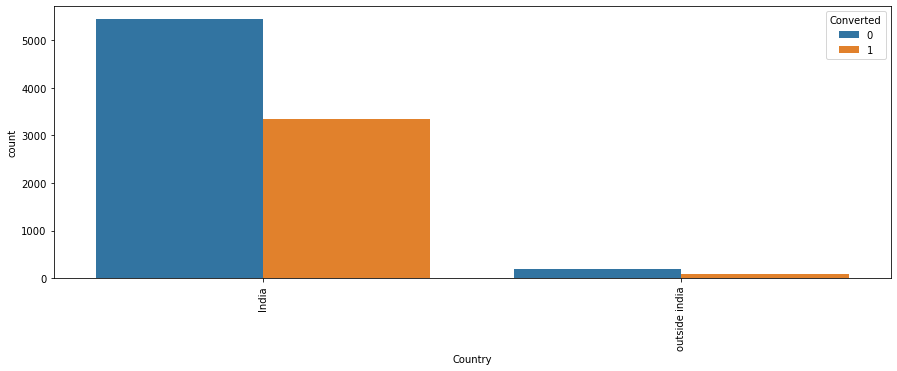

In [280]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_data.Country, hue=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [281]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [282]:
#checking value counts of "City" column

Lead_data['City'].value_counts(dropna=False)

not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

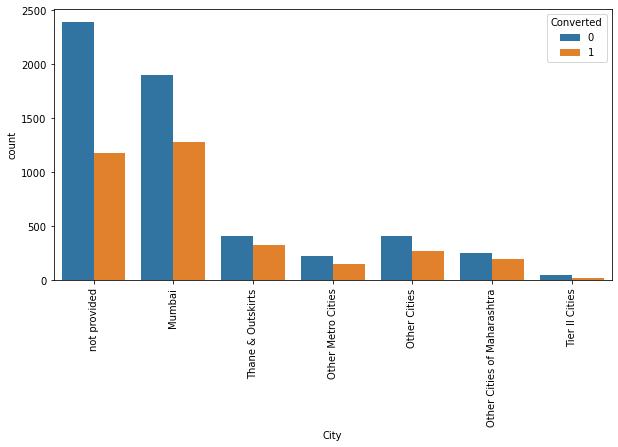

In [283]:
#plotting spread of City columnn

plt.figure(figsize=(10,5))
s1=sns.countplot(Lead_data.City, hue=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

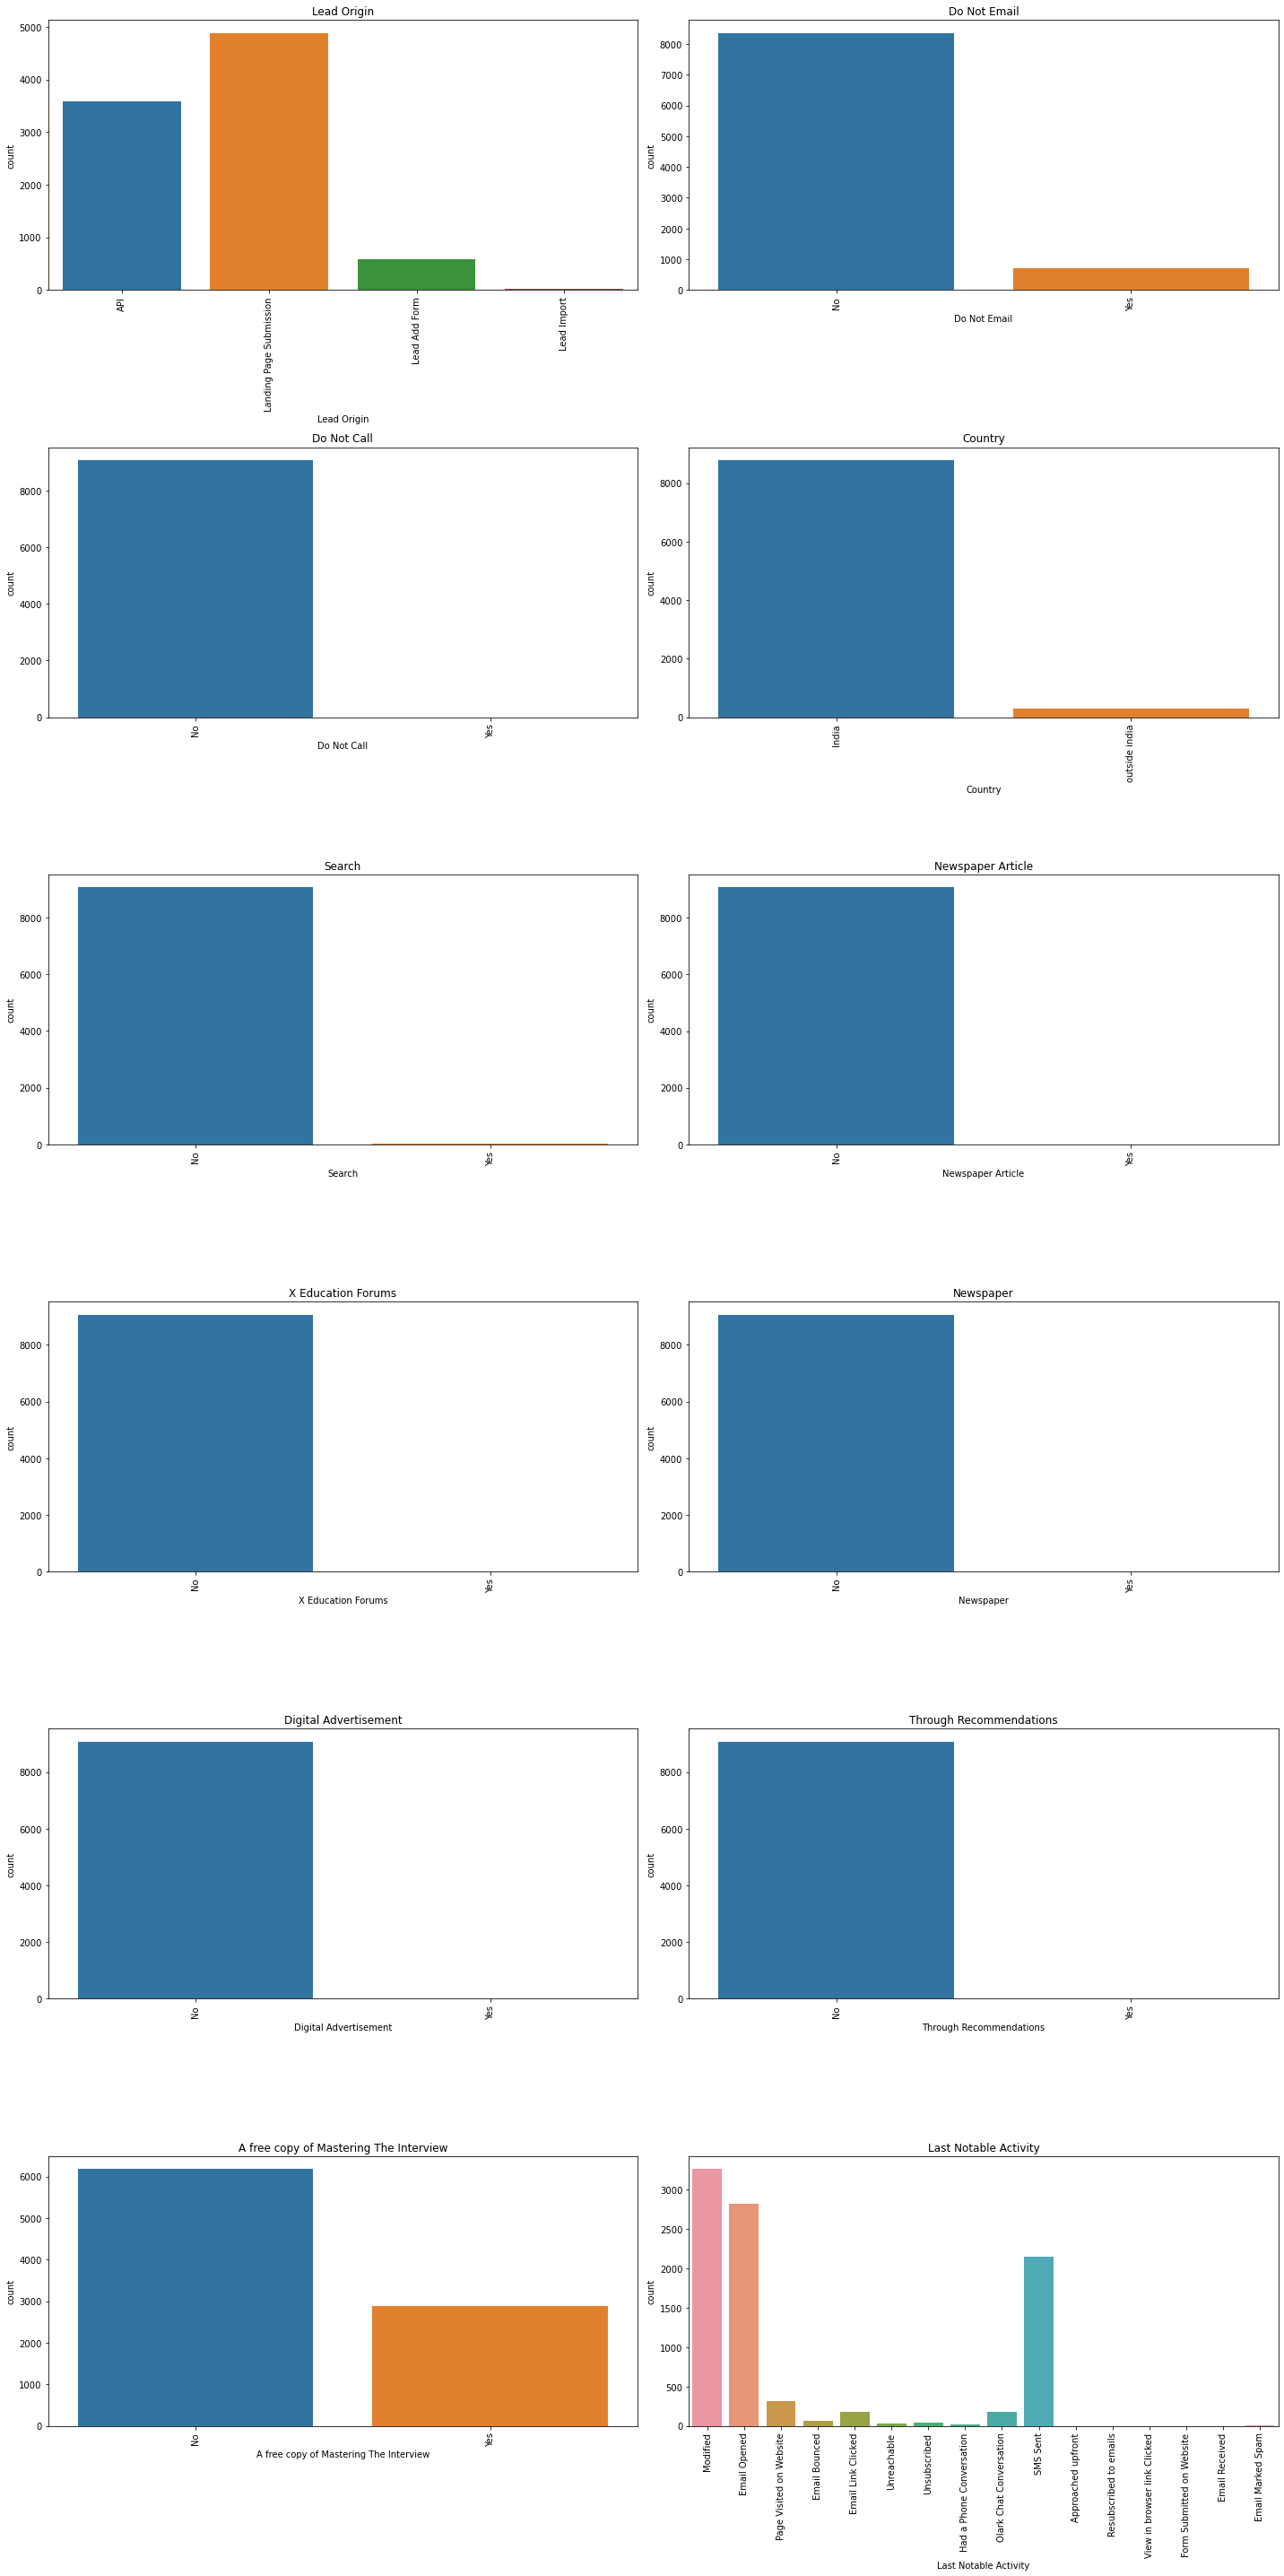

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns for countplots
columns_to_plot = ['Lead Origin', 'Do Not Email', 'Do Not Call', 'Country', 'Search', 'Newspaper Article',
                   'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
                   'A free copy of Mastering The Interview', 'Last Notable Activity']

# Create subplots
fig, axes = plt.subplots(6, 2, figsize=(20, 40))

# Flatten the axes array to iterate through
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    sns.countplot(x=Lead_data[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


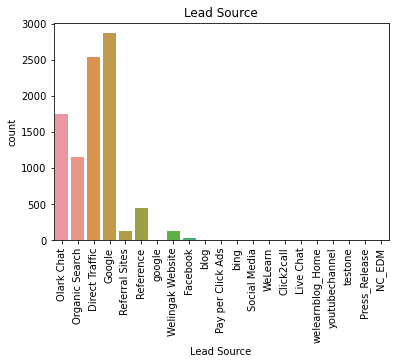

In [286]:
sns.countplot(Lead_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

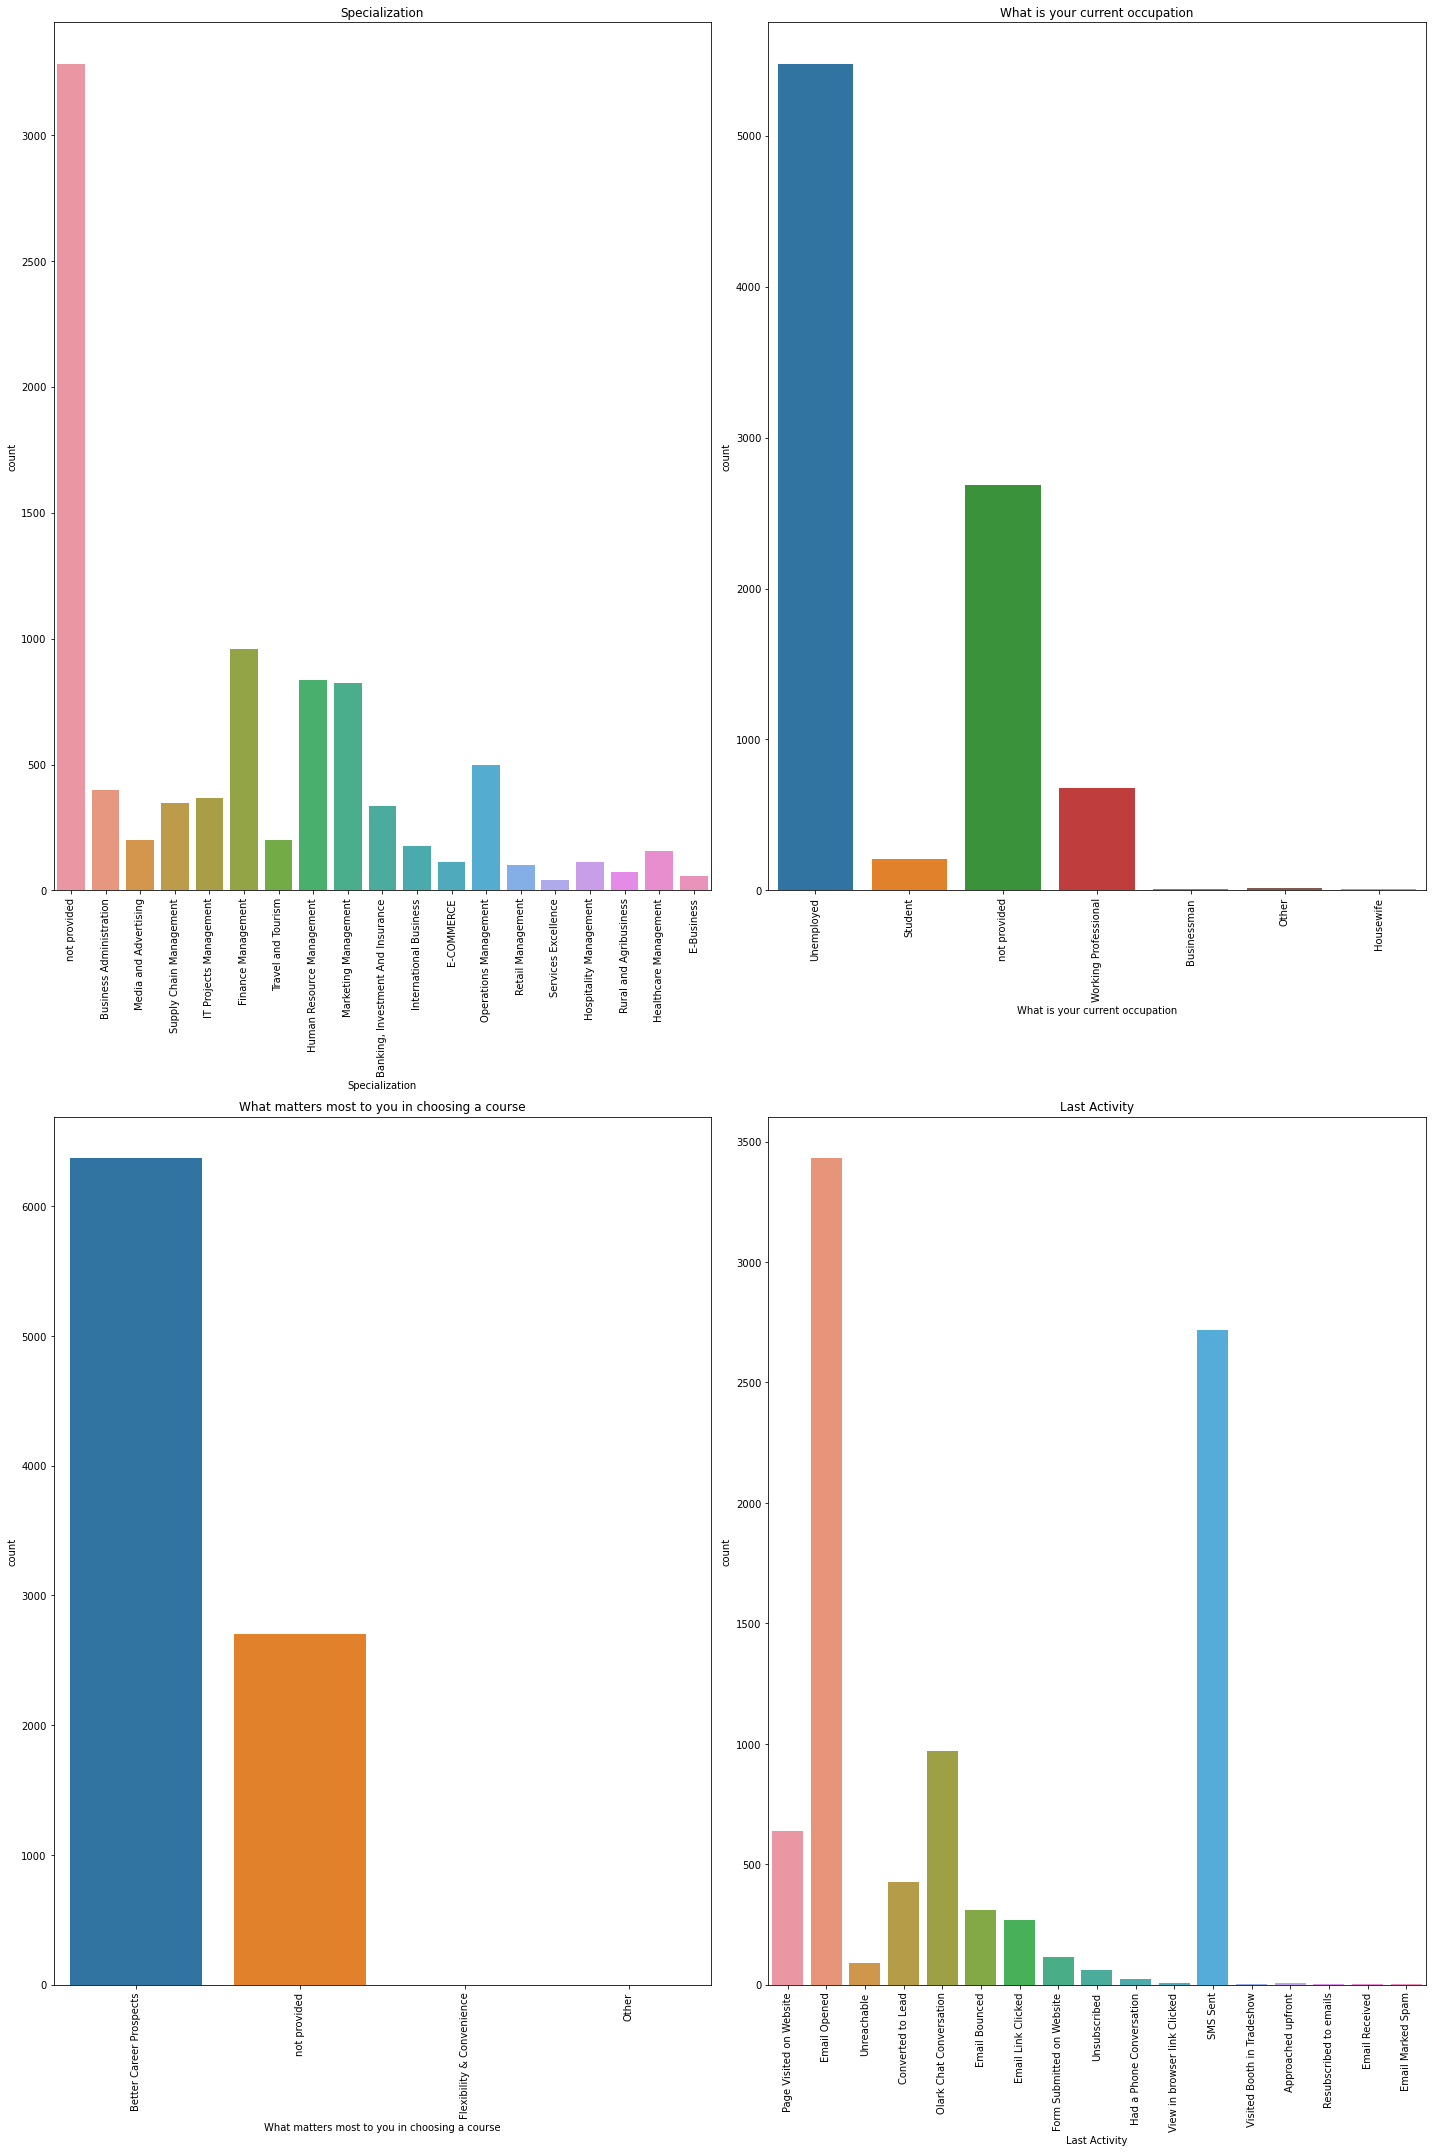

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns for countplots
columns_to_plot = ['Specialization', 'What is your current occupation',
                   'What matters most to you in choosing a course', 'Last Activity']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 30))

# Flatten the axes array to iterate through
axes = axes.ravel()

for i, column in enumerate(columns_to_plot):
    sns.countplot(x=Lead_data[column], ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


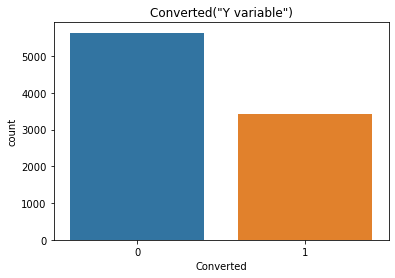

In [289]:
sns.countplot(Lead_data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

## Numerical Variables

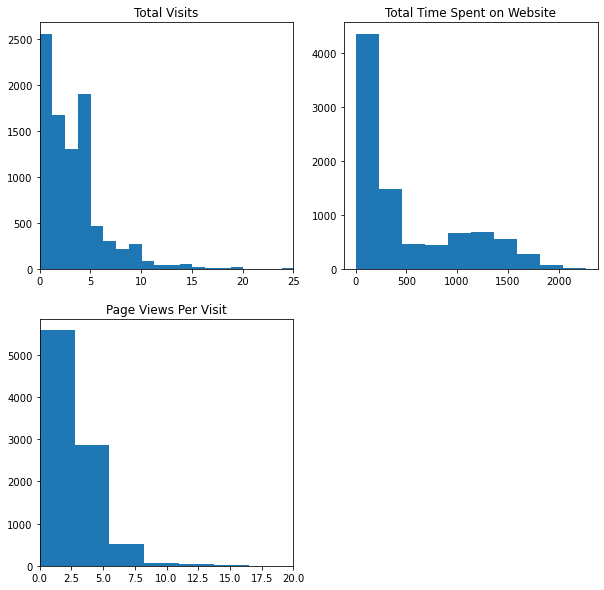

In [290]:

plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(Lead_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Lead_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Lead_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( )         

## Relating all the categorical variables to Converted

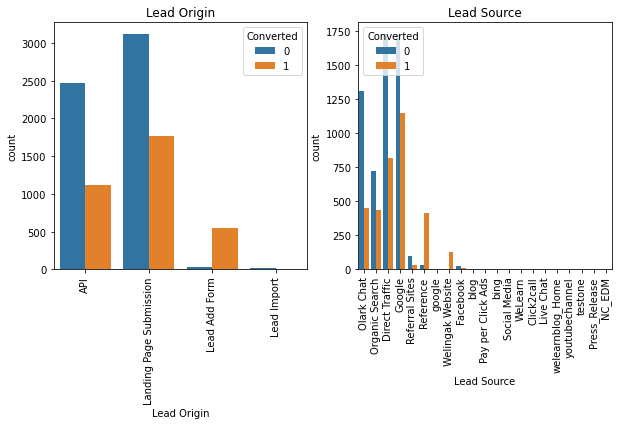

In [291]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()



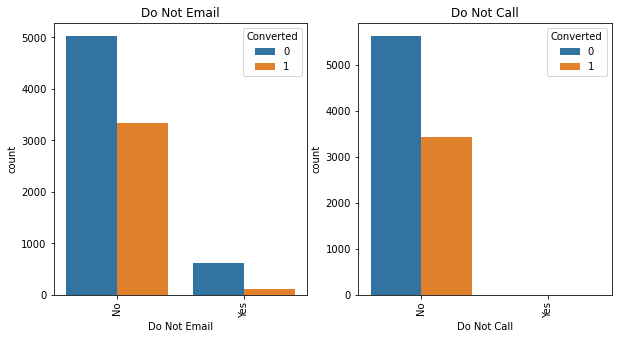

In [292]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

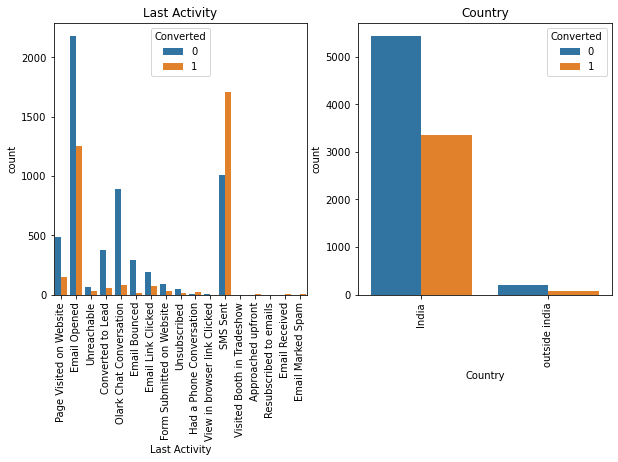

In [293]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

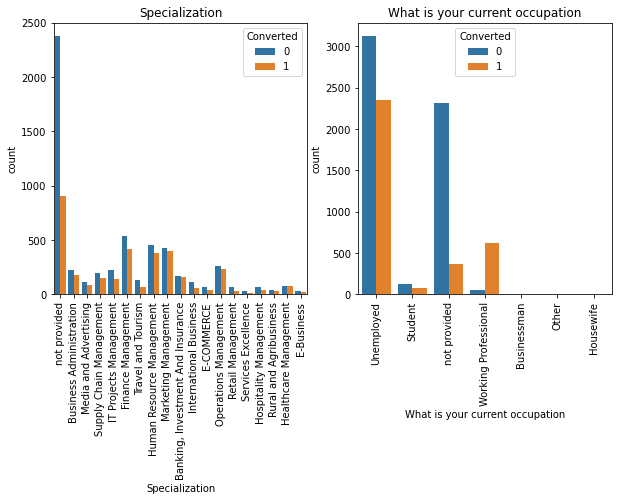

In [294]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

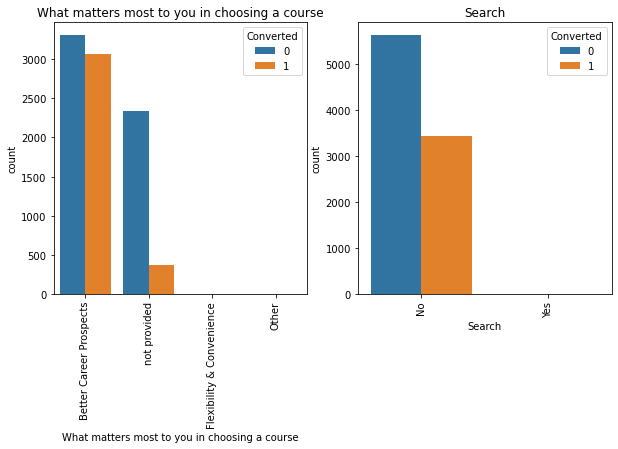

In [295]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

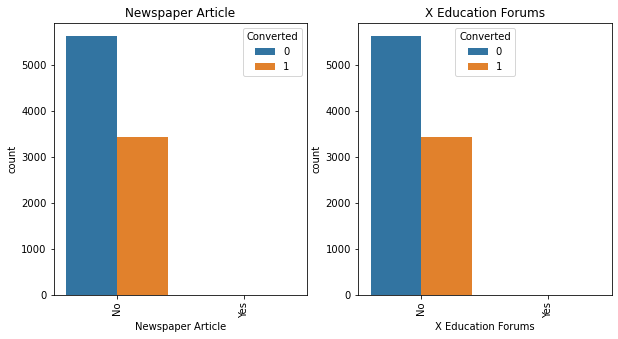

In [296]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

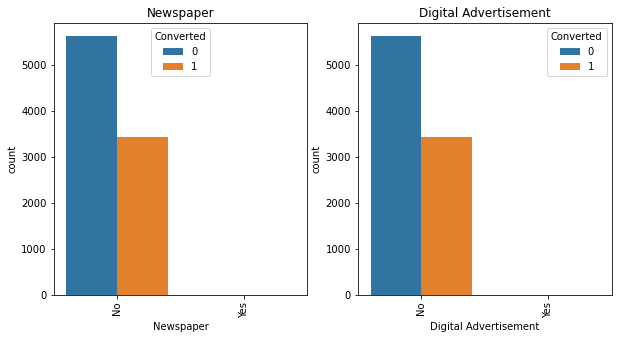

In [297]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

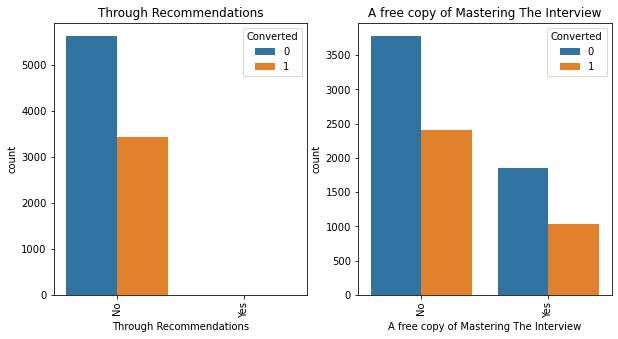

In [298]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

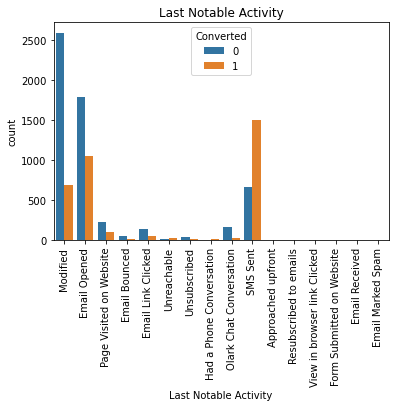

In [299]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

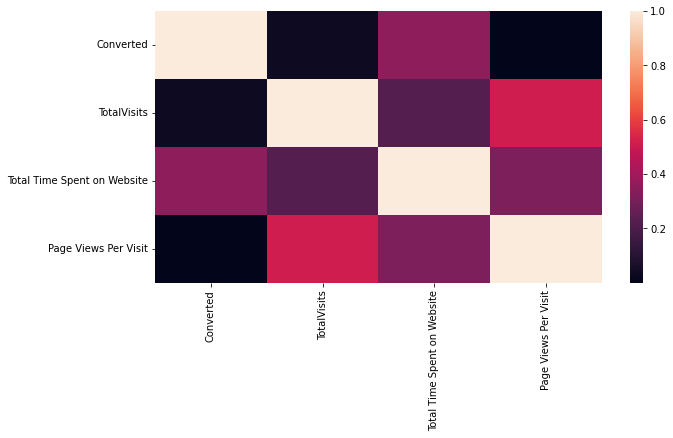

In [300]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(Lead_data.corr())
plt.show()

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

## Outlier

In [301]:
numeric = Lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


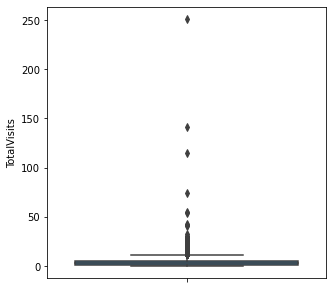

In [302]:
plt.figure(figsize = (5,5))
sns.boxplot(y=Lead_data['TotalVisits'])
plt.show()



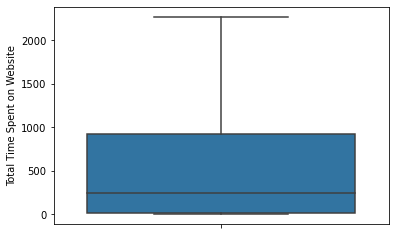

In [303]:
sns.boxplot(y=Lead_data['Total Time Spent on Website'])
plt.show()


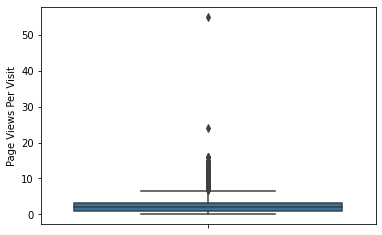

In [304]:
sns.boxplot(y=Lead_data['Page Views Per Visit'])
plt.show()


We can see presence of outliers in TotalVisits 

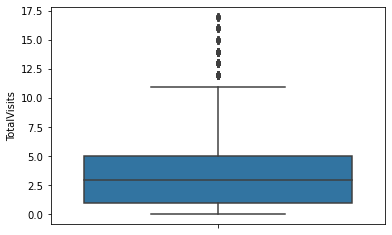

In [305]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = Lead_data.TotalVisits.quantile(0.99)
Lead_data = Lead_data[(Lead_data.TotalVisits <= Q3)]
Q1 = Lead_data.TotalVisits.quantile(0.01)
Lead_data = Lead_data[(Lead_data.TotalVisits >= Q1)]
sns.boxplot(y=Lead_data['TotalVisits'])
plt.show()

## Dummy Variables

In [306]:
#list of columns to be dropped
cols_to_drop=['Country','Tags']

We can drop "Tags" ,As tags variable is generated by the sales sales team after the disscussion with student otherwise it will increase the model accuracy .

In [307]:
#dropping columns
Lead_data = Lead_data.drop(cols_to_drop,1)
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [308]:
#getting a list of categorical columns

cat_cols= Lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [309]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(Lead_data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
Lead_data_dum = pd.concat([Lead_data, dummy], axis=1)
Lead_data_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [310]:
Lead_data_dum = Lead_data_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
Lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Test-Train Split

In [311]:
 #Import the required library
from sklearn.model_selection import train_test_split

In [312]:
X = Lead_data_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [313]:
# Putting the target variable in y
y = Lead_data_dum['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [314]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [315]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Building

In [316]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [317]:
# Import RFE
from sklearn.feature_selection import RFE

In [318]:
# Running RFE with 15 variables as output
# rfe = RFE(lr, 20)
# rfe = rfe.fit(X_train, y_train)
# rfe = RFE(lr, 15)  # Select 15 features
# rfe = rfe.fit(X_train, y_train)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lr = LinearRegression()

# Running RFE with 15 variables as output
rfe = RFE(lr, n_features_to_select=20, step=1)  # Select 15 features
rfe = rfe.fit(X_train, y_train)



In [319]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Lead Origin_Landing Page Submission', False, 45),
 ('Lead Origin_Lead Add Form', False, 31),
 ('Lead Origin_Lead Import', True, 1),
 ('Specialization_Business Administration', False, 47),
 ('Specialization_E-Business', False, 37),
 ('Specialization_E-COMMERCE', False, 42),
 ('Specialization_Finance Management', False, 40),
 ('Specialization_Healthcare Management', False, 38),
 ('Specialization_Hospitality Management', False, 54),
 ('Specialization_Human Resource Management', False, 43),
 ('Specialization_IT Projects Management', False, 46),
 ('Specialization_International Business', False, 50),
 ('Specialization_Marketing Management', False, 39),
 ('Specialization_Media and Advertising', False, 56),
 ('Specialization_Operations Management', False, 48),
 ('Specialization_Retail Management', False, 59),
 ('Specialization_Rural and Agribusiness', False, 41),
 ('Specialization_S

In [320]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

All the variables selected by RFE, next statistics part (p-values and the VIFs)

In [321]:
# Selecting columns selected by RFE
X_train = X_train[col]


In [322]:
# Importing statsmodels
import statsmodels.api as sm


In [323]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2828.1
Date:                Tue, 22 Aug 2023   Deviance:                       5656.2
Time:                        21:50:42   Pearson chi2:                 6.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3477
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5785      0.228     11.325      0.000       2.132       3.025
Total Time Spent on Website                              4.7708      0.161     29.559      0.000       4.454       5.087
Lead Origin_Lead Import                                 23.5912   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -4.8832      0.242    -20.196      0.000      -5.357      -4.409
Lead Source_Facebook                                   -26.9593   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -4.4522      0.239    -18.607      0.000      -4.921      -3.983
Lead Source_Olark Chat                                  -3.3415      0.240    -13.894      0.000      -3.813      -2.870
Lead Source_Organic Search                              -4.6539      0.250    -18.584      0.000      -5.145      -4.163
Lead Source_Pay per Click Ads                          -26.4070   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -28.7735   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Referral Sites                              -4.9231      0.386    -12.742      0.000      -5.680      -4.166
Lead Source_bing                                        -4.4629      1.147     -3.889      0.000      -6.712      -2.214
Lead Source_blog                                       -27.5661   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                     -27.6779   3.69e+04     -0.001      0.999   -7.23e+04    7.22e+04
Lead Source_testone                                    -26.7829   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Last Activity_Email Bounced                             -2.3456      0.320     -7.334      0.000      -2.972      -1.719
Last Activity_Olark Chat Conversation                   -1.9173      0.160    -11.986      0.000      -2.231      -1.604
What is your current occupation_Housewife               22.7401   2.81e+04      0.001      0.999   -5.51e+04    5.51e+04
What is your current occupation_Working Professional     2.7589      0.184     14.994      0.000       2.398       3.120
Last Notable Activity_Had a Phone Conversation          23.8543   2.15e+04      0.001      0.999    -4.2e+04    4.21e+04
Last Notable Activity_Unreachable                        0.6505      0.718      0.907      0.365      -0.756       2.057
========================================================================================================================
"""

In [324]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [325]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,Lead Source_Facebook,23.00
1,Lead Origin_Lead Import,23.00
0,Total Time Spent on Website,2.32
4,Lead Source_Google,1.62
2,Lead Source_Direct Traffic,1.50
15,Last Activity_Olark Chat Conversation,1.39
5,Lead Source_Olark Chat,1.38
6,Lead Source_Organic Search,1.24
17,What is your current occupation_Working Profes...,1.08
14,Last Activity_Email Bounced,1.06


### The VIF values seem fine but some p-values are 99 %. So removing ' What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'.

In [326]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [327]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2836.7
Date:                Tue, 22 Aug 2023   Deviance:                       5673.3
Time:                        21:50:42   Pearson chi2:                 6.55e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3459
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5891      0.228     11.377      0.000       2.143       3.035
Total Time Spent on Website                              4.7638      0.161     29.577      0.000       4.448       5.080
Lead Origin_Lead Import                                 22.5901   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Direct Traffic                              -4.8852      0.242    -20.218      0.000      -5.359      -4.412
Lead Source_Facebook                                   -25.9687   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                      -4.4512      0.239    -18.616      0.000      -4.920      -3.983
Lead Source_Olark Chat                                  -3.3512      0.240    -13.940      0.000      -3.822      -2.880
Lead Source_Organic Search                              -4.6621      0.250    -18.625      0.000      -5.153      -4.171
Lead Source_Pay per Click Ads                          -25.4172   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Press_Release                              -27.7803   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Referral Sites                              -4.9315      0.386    -12.768      0.000      -5.688      -4.174
Lead Source_bing                                        -4.4727      1.147     -3.898      0.000      -6.722      -2.224
Lead Source_blog                                       -26.5747   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_google                                     -26.6853   2.24e+04     -0.001      0.999   -4.38e+04    4.38e+04
Lead Source_testone                                    -25.7926   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Last Activity_Email Bounced                             -2.3501      0.320     -7.349      0.000      -2.977      -1.723
Last Activity_Olark Chat Conversation                   -1.9198      0.160    -12.003      0.000      -2.233      -1.606
What is your current occupation_Working Professional     2.7566      0.184     14.990      0.000       2.396       3.117
Last Notable Activity_Unreachable                        0.6437      0.717      0.897      0.370      -0.762       2.050
========================================================================================================================
"""

In [328]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Facebook,23.00
1,Lead Origin_Lead Import,23.00
0,Total Time Spent on Website,2.32
4,Lead Source_Google,1.62
2,Lead Source_Direct Traffic,1.50
15,Last Activity_Olark Chat Conversation,1.39
5,Lead Source_Olark Chat,1.38
6,Lead Source_Organic Search,1.24
16,What is your current occupation_Working Profes...,1.08
14,Last Activity_Email Bounced,1.06


In [329]:
 X_train.columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [330]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2836.7
Date:                Tue, 22 Aug 2023   Deviance:                       5673.3
Time:                        21:50:43   Pearson chi2:                 6.55e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3459
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5891      0.228     11.377      0.000       2.143       3.035
Total Time Spent on Website                              4.7638      0.161     29.577      0.000       4.448       5.080
Lead Origin_Lead Import                                 22.5901   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Direct Traffic                              -4.8852      0.242    -20.218      0.000      -5.359      -4.412
Lead Source_Facebook                                   -25.9687   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                      -4.4512      0.239    -18.616      0.000      -4.920      -3.983
Lead Source_Olark Chat                                  -3.3512      0.240    -13.940      0.000      -3.822      -2.880
Lead Source_Organic Search                              -4.6621      0.250    -18.625      0.000      -5.153      -4.171
Lead Source_Pay per Click Ads                          -25.4172   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Press_Release                              -27.7803   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Referral Sites                              -4.9315      0.386    -12.768      0.000      -5.688      -4.174
Lead Source_bing                                        -4.4727      1.147     -3.898      0.000      -6.722      -2.224
Lead Source_blog                                       -26.5747   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_google                                     -26.6853   2.24e+04     -0.001      0.999   -4.38e+04    4.38e+04
Lead Source_testone                                    -25.7926   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Last Activity_Email Bounced                             -2.3501      0.320     -7.349      0.000      -2.977      -1.723
Last Activity_Olark Chat Conversation                   -1.9198      0.160    -12.003      0.000      -2.233      -1.606
What is your current occupation_Working Professional     2.7566      0.184     14.990      0.000       2.396       3.117
Last Notable Activity_Unreachable                        0.6437      0.717      0.897      0.370      -0.762       2.050
========================================================================================================================
"""

In [331]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Facebook,23.00
1,Lead Origin_Lead Import,23.00
0,Total Time Spent on Website,2.32
4,Lead Source_Google,1.62
2,Lead Source_Direct Traffic,1.50
15,Last Activity_Olark Chat Conversation,1.39
5,Lead Source_Olark Chat,1.38
6,Lead Source_Organic Search,1.24
16,What is your current occupation_Working Profes...,1.08
14,Last Activity_Email Bounced,1.06


### All the VIF values are good and all the p-values are below 0.05. So we can fix model.

## Creating Prediction

In [332]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.380004
3267    0.930156
5653    0.408219
5072    0.318188
3704    0.160213
1790    0.208195
2482    0.277614
1694    0.318188
8768    0.141181
9225    0.011084
dtype: float64

In [333]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.380004  , 0.93015572, 0.40821854, 0.31818823, 0.16021285,
       0.20819494, 0.27761437, 0.31818823, 0.141181  , 0.01108444])

In [334]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.380004
1,1,0.930156
2,1,0.408219
3,0,0.318188
4,0,0.160213


In [335]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.380004,0
1,1,0.930156,1
2,1,0.408219,0
3,0,0.318188,0
4,0,0.160213,0


## Model Evaluation

In [336]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics


In [337]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3461,  454],
       [ 868, 1510]], dtype=int64)

In [338]:
# Predicted        No         Yes
# Actual
# No              3498      417
# Yes             837      1541

In [339]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7899253138407755

That's around 82% accuracy with is a very good value

In [340]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [341]:
# Calculating the sensitivity
TP/(TP+FN)

0.6349873843566022

In [342]:
# Calculating the specificity
TN/(TN+FP)


0.8840357598978289

With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 70% and specificity of around 88%.

## Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [343]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [344]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

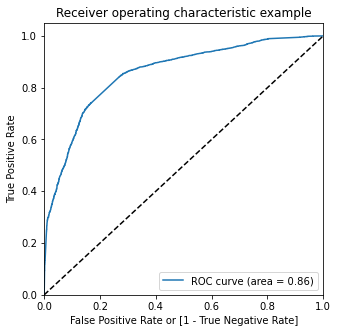

In [345]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.88 which is a very good value

In [346]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.380004,0,1,1,1,1,0,0,0,0,0,0
1,1,0.930156,1,1,1,1,1,1,1,1,1,1,1
2,1,0.408219,0,1,1,1,1,1,0,0,0,0,0
3,0,0.318188,0,1,1,1,1,0,0,0,0,0,0
4,0,0.160213,0,1,1,0,0,0,0,0,0,0,0


In [347]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.515176,0.979815,0.232950
0.2,0.2,0.709201,0.897393,0.594891
0.3,0.3,0.769585,0.849874,0.720817
0.4,0.4,0.800572,0.704794,0.858748
0.5,0.5,0.789925,0.634987,0.884036
0.6,0.6,0.777689,0.556350,0.912133
0.7,0.7,0.757667,0.446173,0.946871
0.8,0.8,0.733990,0.335997,0.975734
0.9,0.9,0.714762,0.260303,0.990805


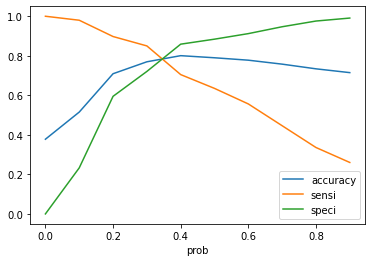

In [348]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35.

In [349]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.380004,0,1,1,1,1,0,0,0,0,0,0,1
1,1,0.930156,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.408219,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.318188,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.160213,0,1,1,0,0,0,0,0,0,0,0,0


In [350]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7999364373112983

In [351]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3293,  622],
       [ 637, 1741]], dtype=int64)

In [352]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]


In [353]:
# Calculating the sensitivity
TP/(TP+FN)


0.7321278385197645

In [354]:
# Calculating the specificity
TN/(TN+FP)

0.8411238825031928

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Prediction on Test set

In [355]:
 #Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [356]:
col = X_train.columns


In [357]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
3308,1.0,0.050176,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4421,1.0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.547975,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5302,1.0,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2169,1.0,0.390405,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.218310,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7836,1.0,0.227113,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8378,1.0,0.179577,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1263,1.0,0.376320,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [358]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.164778
1,1,0.318188
2,1,0.577936
3,0,0.064051
4,0,0.392615


In [359]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.164778,0
1,1,0.318188,0
2,1,0.577936,1
3,0,0.064051,0
4,0,0.392615,1
...,...,...,...
2693,1,0.221634,0
2694,1,0.878293,1
2695,0,0.228372,0
2696,1,0.904921,1


In [360]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7965159377316531

In [361]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1401,  276],
       [ 273,  748]], dtype=int64)

In [362]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [363]:
# Calculating the sensitivity
TP/(TP+FN)


0.732615083251714

In [364]:
# Calculating the specificity
TN/(TN+FP)

0.8354203935599285

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

## Precision-Recall

In [365]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3461,  454],
       [ 868, 1510]], dtype=int64)

In [366]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7688391038696538

In [367]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6349873843566022

With the current cut off as 0.35 we have Precision around 79% and Recall around 70%

### Precision and recall tradeoff

In [368]:
from sklearn.metrics import precision_recall_curve

In [369]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6288    1
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [370]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)


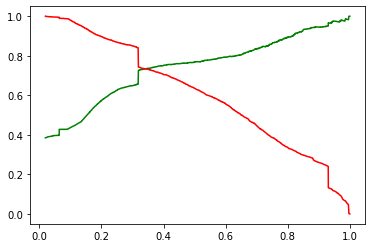

In [371]:

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [372]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.380004,0,1,1,1,1,0,0,0,0,0,0,0
1,1,0.930156,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.408219,0,1,1,1,1,1,0,0,0,0,0,0
3,0,0.318188,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.160213,0,1,1,0,0,0,0,0,0,0,0,0


In [394]:
# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.8010487843635786


In [395]:
# Create confusion matrix on the training data
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

# Display the confusion matrix
print("Confusion Matrix on Training Data:")
print(confusion2)

Confusion Matrix on Training Data:
[[3371  544]
 [ 708 1670]]


In [396]:
# Create the confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

# Extract values using list indexing
TN = confusion2[0, 0]  # True Negatives
FP = confusion2[0, 1]  # False Positives
FN = confusion2[1, 0]  # False Negatives
TP = confusion2[1, 1]  # True Positives

# Print the values
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)


True Negatives (TN): 3371
False Positives (FP): 544
False Negatives (FN): 708
True Positives (TP): 1670


In [397]:
# Precision 
Precision=TP / (TP + FP)
Precision

0.7542908762420958

In [398]:
#Recall 
Recall=TP / (TP + FN)
Recall

0.7022708158116064

With the current cut off as 0.44 we have Precision around 76% and Recall around 76.3% and accuracy 82 %.

## Prediction on Test set

In [378]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.164778
1,1,0.318188
2,1,0.577936
3,0,0.064051
4,0,0.392615


In [379]:

# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.164778,0
1,1,0.318188,0
2,1,0.577936,1
3,0,0.064051,0
4,0,0.392615,0
...,...,...,...
2693,1,0.221634,0
2694,1,0.878293,1
2695,0,0.228372,0
2696,1,0.904921,1


### Check the overall accuracy

In [388]:
# Calculate overall accuracy
accuracy = metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.7946627131208303


In [389]:
# Create confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion2)

Confusion Matrix:
[[1446  231]
 [ 323  698]]


In [390]:
# Create the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted)

# Extract values from the confusion matrix
TP = confusion2[1, 1]  # True Positives
TN = confusion2[0, 0]  # True Negatives
FP = confusion2[0, 1]  # False Positives
FN = confusion2[1, 0]  # False Negatives

# Print the values
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 698
True Negatives: 1446
False Positives: 231
False Negatives: 323


In [391]:
# Calculate Precision
precision = TP / (TP + FP)
precision 

0.751345532831001

In [392]:
# Calculate Recall
recall = TP / (TP + FN)

In [393]:
recall

0.683643486777669